In [21]:
import imageio
import numpy as np
import scipy.ndimage as img
import matplotlib.pyplot as plt

In [22]:
def imageRead(imgname, pilmode='L', arrtype=float):
    """
    read an image file into a numpy array
    
    imgname: str
        name of image file to be read
    pilmode: str
        for luminance / intesity images use ’L’
        for RGB color images use ’RGB’
    arrtype: numpy dtype
        use np.float, np.uint8, ...
    """
    return imageio.imread(imgname, pilmode=pilmode).astype(arrtype)

def imageWrite(arrF, imgname, arrtype=np.uint8):
    """
    write a numpy array as an image file
    the file type is inferred from the suffix of parameter imgname, e.g. ’.png’
    
    arrF: array_like
        array to be written
    imgname: str
        name of image file to be written
    arrtype: numpy dtype
        use np.uint8, ...
    """
    imageio.imwrite(imgname, arrF.astype(arrtype))

(256, 256)


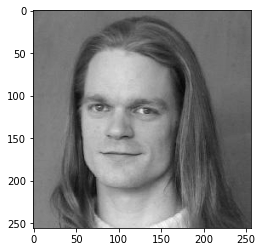

In [23]:
arrF = imageRead('Data/portrait.png')
print(arrF.shape)
plt.imshow(arrF / 255, cmap='gray')
plt.show()

In [46]:
def embossV1(arrF):
    M, N = arrF.shape
    arrG = np.zeros((M, N))
    for i in range(1, M-1):
        for j in range(1, N-1):
            arrG[i, j] = 128 + arrF[i+1,j+1] - arrF[i-1, j-1]
            arrG[i, j] = np.maximum(0, np.minimum(255, arrG[i, j]))
    return arrG

def embossV2(arrF):
    M, N = arrF.shape
    arrG = np.zeros((M, N))
    arrG[1:M-1, 1:N-1] = 128 + arrF[2:, 2:] - arrF[:-2, :-2]
    arrG = np.maximum(0, np.minimum(255, arrG))
    return arrG

def embossV3(arrF):
    mask = np.array([[-1, 0, 0],
                     [ 0, 0, 0],
                     [ 0, 0, +1]])
    arrG = 128 + img.correlate(arrF, mask, mode='reflect')
    arrG = np.maximum(0, np.minimum(255, arrG))
    return arrG

def embossV4(arrF):
    arrG = 128 + arrF[2:, 2:] - arrF[:-2, :-2]
    arrG[arrG < 0] = 0
    arrG[arrG > 255] = 255
    return arrG

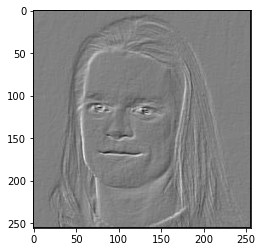

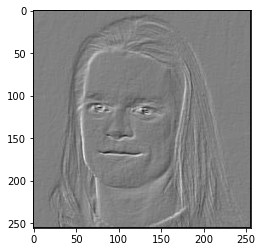

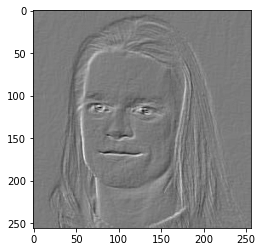

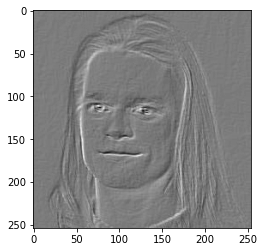

In [53]:
mtds = [embossV1, embossV2, embossV3, embossV4]

for i, mtd in enumerate(mtds):
    arrF_embossed = mtd(arrF)
    plt.imshow(arrF_embossed, cmap='gray')
    plt.imsave(f'Figures/t1-v{i}.png', arrF_embossed, cmap='gray')
    plt.show()

### 1.1

#### a)

In [60]:
import timeit, functools

In [61]:
arrF = imageRead('Data/portrait.png')

In [63]:
nRep = 3
nRun = 100
for mtd in mtds:
    ts = timeit.Timer(functools.partial(mtd, arrF)).repeat(nRep, nRun)
    print (min(ts) / nRun)

0.44967310061001625
0.0007028839599661297
0.0012256227100078832
0.00038784879998274844


#### b)

In [64]:
arrF = imageRead('Data/asterix.png')

In [65]:
nRep = 3
nRun = 100
for mtd in mtds:
    ts = timeit.Timer(functools.partial(mtd, arrF)).repeat(nRep, nRun)
    print (min(ts) / nRun)

2.5130979724999998
0.011546289530015201
0.011558454990008613
0.005792928150003718


In [66]:
print(arrF.shape)

(496, 730)
